In [1]:
#melatonin_data <- read.csv("Melatonin-Time-Stool.csv")
#melatonin_data <- read.csv("Melatonin-Clock-Stool.csv")
#melatonin_data <- read.csv("Melatonin-Time-Sleep.csv")
melatonin_data <- read.csv("Melatonin-Time-Meal.csv")

#melatonin_data <- melatonin_data[melatonin_data$Cohort == "SDEGU" | melatonin_data$Cohort == "NUTR",]
melatonin_data_day1<- melatonin_data[melatonin_data$Day=="1",]
melatonin_data_day2<- melatonin_data[melatonin_data$Day=="2",]

Study_variable <- 'Melatonin'  
#Time_variable <- 'Time_since_last_stool'  
#Time_variable <- 'Clock_stool'  
#Time_variable <- 'Time_since_last_sleep'  
Time_variable <- 'Time_since_last_meal'  

Age <- 'all' #'3 months', '6 months', '12 months', 'all'

In [2]:
#melatonin_data$Melatonin_pg_g_Stool <- as.numeric(melatonin_data$Melatonin_pg_g_Stool)

In [3]:
# Load necessary libraries
library(dplyr)
library(rlang)

# Define a function to clean the data and remove outliers
remove_outliers <- function(df, column_name) {
  
  # Convert the column name to a symbol
  column_sym <- sym(column_name)
  
  # Clean the data by ensuring the specified column is non-NaN and numeric
  cleaned_data <- df %>%
    filter(!is.na(!!column_sym)) %>%
    mutate(!!column_sym := as.numeric(!!column_sym))
  
  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 <- quantile(cleaned_data[[column_name]], 0.25, na.rm = TRUE)
  Q3 <- quantile(cleaned_data[[column_name]], 0.75, na.rm = TRUE)
  
  # Calculate the IQR (Interquartile Range)
  IQR_value <- IQR(cleaned_data[[column_name]], na.rm = TRUE)
  
  # Define lower and upper bounds
  lower_bound <- Q1 - 1.5 * IQR_value
  upper_bound <- Q3 + 1.5 * IQR_value
  
  # Remove rows that are considered outliers
  cleaned_data <- cleaned_data %>%
    filter((.data[[column_name]] >= lower_bound) & (.data[[column_name]] <= upper_bound))
  
  return(cleaned_data)
}

# Example usage:
melatonin_data <- remove_outliers(melatonin_data, Study_variable)
# head(cleaned_samples)
dim(melatonin_data)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 836   7

In [4]:
library(dplyr)
# Function to convert time format to hours
convert_to_hours <- function(time_str) {
  time_parts <- unlist(strsplit(time_str, ":"))
  
  if (length(time_parts) == 2) {
    hours <- as.numeric(time_parts[1])
    minutes <- as.numeric(time_parts[2])
    total_hours <- hours + minutes / 60
  } else if (length(time_parts) == 3) {
    hours <- as.numeric(time_parts[1])
    minutes <- as.numeric(time_parts[2])
    seconds <- as.numeric(time_parts[3])
    total_hours <- hours + minutes / 60 + seconds / 3600
  } else {
    total_hours <- NA
  }
  
  return(total_hours)
}

# Assuming 'convert_to_hours' is a function that takes a column and converts its values to hours
melatonin_data <- melatonin_data %>%
  mutate(!!sym('Time_var') := sapply(!!sym(Time_variable), convert_to_hours))

dim(melatonin_data)
melatonin_data

[1] 836   8

Cohort SubjectID Timepoint Day Time_since_last_meal Melatonin Sample_Codes
1   NUTR   F300      t2        2   11:30                155.03    F300-t2     
2   NUTR   F309      t1        2   1:45                 128.02    F309-t1     
3   NUTR   F304      t1        2   1:15                  72.51    F304-t1     
4   NUTR   F302      t1        2   1:00                 119.22    F302-t1     
5   NUTR   F310      t2        2   0:30                  49.48    F310-t2     
6   NUTR   F306      t2        2   0:30                 182.20    F306-t2     
7   NUTR   F300      t2        1   9:20                  93.59    F300-t2     
8   NUTR   F306      t2        1   3:00                 334.52    F306-t2     
9   NUTR   F304      t1        1   2:15                  57.20    F304-t1     
10  NUTR   F302      t2        1   0:35                 307.46    F302-t2     
11  NUTR   F309      t1        1   0:10                 144.26    F309-t1     
12  NUTR   F310      t2        1   0:00                  92.34    F310-t2     
13  SDEGU  S069      t2        3   7:15                  82.09    S069-t2     
14  SDEGU  S044      t3        3   1:30                 394.76    S044-t3     
15  SDEGU  S062      t1        3   0:50                  68.98    S062-t1     
16  SDEGU  S025      t2        3   0:15                 136.75    S025-t2     
17  SDEGU  S084      t3        2   16:10                243.85    S084-t3     
18  SDEGU  S145      t3        2   13:30                228.85    S145-t3     
19  SDEGU  S128      t3        2   13:05                151.99    S128-t3     
20  SDEGU  S003      t3        2   12:15                 81.71    S003-t3     
21  SDEGU  S089      t3        2   12:15                348.04    S089-t3     
22  SDEGU  S133      t3        2   12:00                211.26    S133-t3     
23  SDEGU  S086      t3        2   11:30                298.34    S086-t3     
24  SDEGU  S015      t3        2   11:00                259.95    S015-t3     
25  SDEGU  S150      t2        2   10:55                114.19    S150-t2     
26  SDEGU  S021      t2        2   9:30                 152.34    S021-t2     
27  SDEGU  S023      t1        2   8:10                 115.44    S023-t1     
28  SDEGU  S083      t2        2   8:00                  58.54    S083-t2     
29  SDEGU  S078      t3        2   6:40                 101.98    S078-t3     
30  SDEGU  S003      t2        2   6:15                 133.47    S003-t2     
⋮   ⋮      ⋮         ⋮         ⋮   ⋮                    ⋮         ⋮           
807 SLEEPY I014      pre       1   0:00                 165.92    I014-pre    
808 SPIN   M010      t2        2   4:00                 415.11    M010-t2     
809 SPIN   M006      t2        2   2:45                 291.66    M006-t2     
810 SPIN   M003      t1        2   2:15                 110.62    M003-t1     
811 SPIN   M013      t2        2   2:15                 146.80    M013-t2     
812 SPIN   M006      t1        2   0:30                 267.26    M006-t1     
813 SPIN   M007      t1        2   0:20                 187.09    M007-t1     
814 SPIN   M004      t2        2   0:15                 110.18    M004-t2     
815 SPIN   M002      t2        2   0:15                 185.76    M002-t2     
816 SPIN   M005      t2        2   0:00                 110.83    M005-t2     
817 SPIN   M004      t1        2   0:00                 148.01    M004-t1     
818 SPIN   M001      t2        2   0:00                 176.03    M001-t2     
819 SPIN   M010      t1        2   0:00                 228.45    M010-t1     
820 SPIN   M011      t2        2   0:00                 234.07    M011-t2     
821 SPIN   M011      t1        2   0:00                 282.68    M011-t1     
822 SPIN   M003      t2        1   3:45                 144.24    M003-t2     
823 SPIN   M004      t1        1   2:30                 101.31    M004-t1     
824 SPIN   M009      t1        1   2:30                 229.48    M009-t1     
825 SPIN   M005      t2        1   1:53               

In [5]:
# Example usage:
# preprocess and remove outlier
melatonin_data <- remove_outliers(melatonin_data, "Time_var")


In [6]:
# Load necessary library
library(dplyr)

# Step 1: Filter the data for Sample_Codes that appear in both Day 1 and Day 2
melatonin_filtered <- melatonin_data %>%
  filter(Day %in% c(1, 2)) %>%  # Keep rows for Day 1 and Day 2
  group_by(Sample_Codes) %>%    # Group by Sample_Codes
  filter(n() == 2) %>%          # Keep only Sample_Codes that appear on both Day 1 and Day 2
  ungroup()  # Ungroup after filtering

# View the result
print(melatonin_filtered)


# A tibble: 668 × 8
   Cohort SubjectID Timepoint   Day Time_since_last_meal Melatonin Sample_Codes
   <chr>  <chr>     <chr>     <int> <chr>                    <dbl> <chr>       
 1 NUTR   F309      t1            2 1:45                     128.  F309-t1     
 2 NUTR   F304      t1            2 1:15                      72.5 F304-t1     
 3 NUTR   F310      t2            2 0:30                      49.5 F310-t2     
 4 NUTR   F306      t2            2 0:30                     182.  F306-t2     
 5 NUTR   F306      t2            1 3:00                     335.  F306-t2     
 6 NUTR   F304      t1            1 2:15                      57.2 F304-t1     
 7 NUTR   F309      t1            1 0:10                     144.  F309-t1     
 8 NUTR   F310      t2            1 0:00                      92.3 F310-t2     
 9 SDEGU  S047      t3            2 4:30                      66.6 S047-t3     
10 SDEGU  S119      t2            2 4:29                     143.  S119-t2     
# ℹ 658 more rows
# 

In [7]:
melatonin_filtered_day1 <- melatonin_filtered[melatonin_filtered$Day==1,]
melatonin_filtered_day2 <- melatonin_filtered[melatonin_filtered$Day==2,]

colnames(melatonin_filtered_day1)[4] <- "Day1"
colnames(melatonin_filtered_day2)[4] <- "Day2"

colnames(melatonin_filtered_day1)[6] <- "Melatonin1"
colnames(melatonin_filtered_day2)[6] <- "Melatonin2"


colnames(melatonin_filtered_day1)[8] <- "Time_var1"
colnames(melatonin_filtered_day2)[8] <- "Time_var2"


# Create a new dataframe with selected columns
melatonin_filtered_day1 <- melatonin_filtered_day1[, c("Sample_Codes", "Cohort", "SubjectID", "Timepoint", "Day1", "Melatonin1", "Time_var1")]
melatonin_filtered_day2 <- melatonin_filtered_day2[, c("Sample_Codes", "Day2", "Melatonin2", "Time_var2")]



In [8]:
merged_df <- merge(melatonin_filtered_day1, melatonin_filtered_day2, by = "Sample_Codes", all.x = TRUE)

# View the merged dataframe
head(merged_df)
dim(merged_df)

Sample_Codes Cohort SubjectID Timepoint Day1 Melatonin1 Time_var1 Day2
1 F304-t1      NUTR   F304      t1        1     57.20     2.2500000 2   
2 F306-t2      NUTR   F306      t2        1    334.52     3.0000000 2   
3 F309-t1      NUTR   F309      t1        1    144.26     0.1666667 2   
4 F310-t2      NUTR   F310      t2        1     92.34     0.0000000 2   
5 I003-post    SLEEPY I003      post      1    150.18     1.2500000 2   
6 I004-pre     SLEEPY I004      pre       1    135.60     0.9166667 2   
  Melatonin2 Time_var2 
1  72.51     1.25000000
2 182.20     0.50000000
3 128.02     1.75000000
4  49.48     0.50000000
5 161.86     0.00000000
6  40.22     0.08333333

[1] 334  10

In [9]:
merged_df$age_group <- ifelse(merged_df$Timepoint == 't3', 12, 
                        ifelse(merged_df$Timepoint == 't2', 6, 
                        ifelse(merged_df$Timepoint == 't1', 3, 0)))
#merged_df <- merged_df[merged_df$age_group!=0,]
if(Age== '3 months')
    merged_df <- merged_df[merged_df$age_group==3,]

if(Age== '6 months')
    merged_df <- merged_df[merged_df$age_group==6,]

if(Age== '12 months')
    merged_df <- merged_df[merged_df$age_group==12,]

In [10]:
# Add new columns calculating differences
merged_df <-merged_df %>%
  mutate(Absolute_Difference_in_Melatonin_pg_g = abs(Melatonin1 - Melatonin2),
         Time_Difference_Day1_Day2 = abs(Time_var1 - Time_var2))

# Display the updated dataframe


In [11]:
# Calculate the Pearson correlation between Melatonin_diff and Time_since_last_stool_diff
correlation_result <- cor(merged_df$Absolute_Difference_in_Melatonin_pg_g, merged_df$Time_Difference_Day1_Day2, method = "pearson")

# Display the correlation result
print(correlation_result)


[1] -0.1205702


P-value for Time_diff:  0.02757473 


`geom_smooth()` using formula = 'y ~ x'


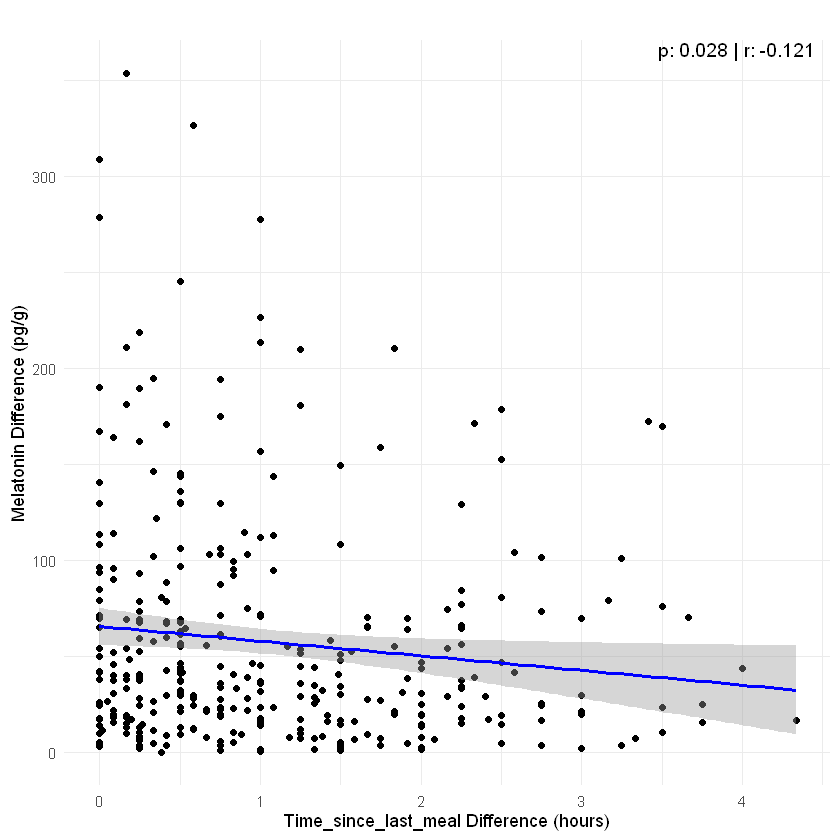

In [12]:
# Perform linear regression
library(ggplot2)

lm_model <- lm(Absolute_Difference_in_Melatonin_pg_g ~ Time_Difference_Day1_Day2, data = merged_df)

# Extract the p-value from the model
lm_summary <- summary(lm_model)
p_value <- lm_summary$coefficients[2, 4]  # p-value for the Time_diff coefficient

# Print the p-value
cat("P-value for Time_diff: ", p_value, "\n")

# Create a scatter plot with linear regression line and display p-value on the plot
# Create a scatter plot with linear regression line and display p-value and r-value inside the plot
Plot <- ggplot(merged_df, aes(x = Time_Difference_Day1_Day2, y = Absolute_Difference_in_Melatonin_pg_g)) +
  geom_point() +  # Add scatter points
  geom_smooth(method = "lm", col = "blue") +  # Add a linear regression line
  labs(
    title = "",
    x = paste0(Time_variable, " Difference (hours)"),
    y = "Melatonin Difference (pg/g)"
  ) +
  annotate(
    "text",
    x = Inf, y = Inf,
    label = paste0("p: ", round(p_value, 3), " | r: ", round(correlation_result, 3)),
    hjust = 1.1, vjust = 1.1, size = 4, color = "black"
  ) +  # Place the p-value and r-value inside the plot
  theme_minimal()

# Display the plot
print(Plot)

In [13]:
# Display the correlation result and p-value
a <- paste0("Pearson Correlation: ", correlation_result)


In [14]:
ggsave(paste0(Time_variable, "_VS_melat_diff.svg"), plot = Plot, width = 8, height = 6)


`geom_smooth()` using formula = 'y ~ x'


In [15]:
# Create a text string with the results
a <- paste0(Time_variable, ":\nPearson Correlation: ", correlation_result, "\n",
             "P-value: ", p_value, "\n")

# Save the text string to a file
cat(a, file = "correlation_results.txt", append = TRUE)


In [16]:
# Check for duplicates
if (any(duplicated(merged_df$Sample_Codes))) {
  # Remove duplicates, keeping only the first occurrence
  merged_df <- merged_df[!duplicated(merged_df$Sample_Codes), ]
  
  # Print a message indicating duplicates were removed
  message("Duplicates were found and removed.")
} else {
  # Print a message indicating no duplicates were found
  message("No duplicates were found.")
}

# View the cleaned dataframe
head(merged_df)
dim(merged_df)

No duplicates were found.



Sample_Codes Cohort SubjectID Timepoint Day1 Melatonin1 Time_var1 Day2
1 F304-t1      NUTR   F304      t1        1     57.20     2.2500000 2   
2 F306-t2      NUTR   F306      t2        1    334.52     3.0000000 2   
3 F309-t1      NUTR   F309      t1        1    144.26     0.1666667 2   
4 F310-t2      NUTR   F310      t2        1     92.34     0.0000000 2   
5 I003-post    SLEEPY I003      post      1    150.18     1.2500000 2   
6 I004-pre     SLEEPY I004      pre       1    135.60     0.9166667 2   
  Melatonin2 Time_var2  age_group Absolute_Difference_in_Melatonin_pg_g
1  72.51     1.25000000 3          15.31                               
2 182.20     0.50000000 6         152.32                               
3 128.02     1.75000000 3          16.24                               
4  49.48     0.50000000 6          42.86                               
5 161.86     0.00000000 0          11.68                               
6  40.22     0.08333333 0          95.38                               
  Time_Difference_Day1_Day2
1 1.0000000                
2 2.5000000                
3 1.5833333                
4 0.5000000                
5 1.2500000                
6 0.8333333

[1] 334  13

In [17]:
merged_df$baby_id <- sub("-.*", "", merged_df$Sample_Codes)
dim(merged_df)

[1] 334  14

In [18]:
# Load necessary libraries
library(Maaslin2)

if (Age!='all'){
# Create input_data as a data frame and set row names
input_data1 <- merged_df[, c('Absolute_Difference_in_Melatonin_pg_g'), drop = FALSE]
rownames(input_data1) <- merged_df$Sample_Codes

# Create input_metadata as a data frame and set row names
input_metadata1 <- merged_df[, c('Time_Difference_Day1_Day2'), drop = FALSE]
rownames(input_metadata1) <- merged_df$Sample_Codes

# Check and clean missing data
input_data1 <- na.omit(input_data1)
input_metadata1 <- na.omit(input_metadata1)

# Ensure output directory exists
output_dir <- paste0(paste0("results/",Time_variable,"/", Age, "/"), showWarnings = FALSE)
dir.create(output_dir, recursive = TRUE, showWarnings = FALSE)

# Run MaAslin2 for multivariate testing
maaslin_results <- Maaslin2(
    input_data = input_data1,
    input_metadata = input_metadata1,
    output = output_dir,
    fixed_effects = c('Time_Difference_Day1_Day2'), # Include independent variables and covariate
    random_effects = NULL, # Use random effects if needed
    normalization = 'NONE', # Or another method if required
    standardize = TRUE
)
    }


Warning message:
"package 'Maaslin2' was built under R version 4.4.2"


In [19]:
# Load necessary libraries
library(Maaslin2)

if (Age=='all'){
# Create input_data as a data frame and set row names
input_data1 <- merged_df[, c('Absolute_Difference_in_Melatonin_pg_g'), drop = FALSE]
rownames(input_data1) <- merged_df$Sample_Codes

# Create input_metadata as a data frame and set row names
input_metadata1 <- merged_df[, c('Time_Difference_Day1_Day2', 'baby_id'), drop = FALSE]
rownames(input_metadata1) <- merged_df$Sample_Codes

# Check and clean missing data
input_data1 <- na.omit(input_data1)
input_metadata1 <- na.omit(input_metadata1)

# Ensure output directory exists
output_dir <- paste0(paste0("results/",Time_variable,"/", Age, "/"), showWarnings = FALSE)
dir.create(output_dir, recursive = TRUE, showWarnings = FALSE)

# Run MaAslin2 for multivariate testing
maaslin_results <- Maaslin2(
    input_data = input_data1,
    input_metadata = input_metadata1,
    output = output_dir,
    fixed_effects = c('Time_Difference_Day1_Day2'), # Include independent variables and covariate
    random_effects = c('baby_id'), # Use random effects if needed
    normalization = 'NONE', # Or another method if required
    standardize = TRUE
)
    }

[1] "Creating output feature tables folder"
[1] "Creating output fits folder"
[1] "Creating output figures folder"
2025-04-02 17:24:18.524169 INFO::Writing function arguments to log file
2025-04-02 17:24:18.550768 INFO::Verifying options selected are valid
2025-04-02 17:24:18.571215 INFO::Determining format of input files
2025-04-02 17:24:18.572537 INFO::Input format is data samples as rows and metadata samples as rows
2025-04-02 17:24:18.574867 INFO::Formula for random effects: expr ~ (1 | baby_id)
2025-04-02 17:24:18.575955 INFO::Formula for fixed effects: expr ~  Time_Difference_Day1_Day2
2025-04-02 17:24:18.576929 INFO::Filter data based on min abundance and min prevalence
2025-04-02 17:24:18.577829 INFO::Total samples in data: 334
2025-04-02 17:24:18.578763 INFO::Min samples required with min abundance for a feature not to be filtered: 33.400000
2025-04-02 17:24:18.580009 INFO::Total filtered features: 0
2025-04-02 17:24:18.580978 INFO::Filtered feature names from abundance and pr

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In [20]:
maaslin_results

$results
                                feature                  metadata
1 Absolute_Difference_in_Melatonin_pg_g Time_Difference_Day1_Day2
                      value       coef    stderr       pval
1 Time_Difference_Day1_Day2 -0.1693347 0.0957499 0.07789651
                       name       qval   N N.not.zero
1 Time_Difference_Day1_Day2 0.07789651 334        334

$residuals
                                        F304-t1  F306-t2    F309-t1   F310-t2
Absolute_Difference_in_Melatonin_pg_g -1.084522 2.451175 -0.8976287 0.2928947
                                      I003-post I004-pre  I006-post I007-post
Absolute_Difference_in_Melatonin_pg_g -1.425712 1.490606 0.04943033 -2.584614
                                       I007-pre   I008-pre I009-post I010-post
Absolute_Difference_in_Melatonin_pg_g 0.1169335 -0.2081981  1.451061 0.4136133
                                       I012-post I013-post I013-pre  I014-pre
Absolute_Difference_in_Melatonin_pg_g -0.4130047 0.4886502 0.888585 0.4151871
                                         M001-t2  M002-t2    M003-t1   M004-t1
Absolute_Difference_in_Melatonin_pg_g -0.1914792 1.275918 -0.1518488 0.7745809
                                         M004-t2    M005-t2   M006-t1   M006-t2
Absolute_Difference_in_Melatonin_pg_g -0.5029264 0.09084637 0.6347514 0.9073347
                                         M007-t1   M011-t1   M013-t2  S001-t2
Absolute_Difference_in_Melatonin_pg_g -0.5313514 0.5690751 -2.947453 2.378469
                                          S001-t3    S004-t2  S004-t3
Absolute_Difference_in_Melatonin_pg_g 0.002828544 -0.6789532 0.153544
                                         S005-t3  S006-t3    S007-t1
Absolute_Difference_in_Melatonin_pg_g -0.2443005 2.013288 -0.5639584
                                          S007-t2  S007-t3  S009-t1   S009-t2
Absolute_Difference_in_Melatonin_pg_g -0.01478791 1.637967 1.507173 -4.333501
                                        S010-t1    S010-t3  S011-t1    S011-t3
Absolute_Difference_in_Melatonin_pg_g -3.310784 -0.8118309 0.830765 -0.2989804
                                        S012-t1  S012-t3   S013-t1  S013-t3
Absolute_Difference_in_Melatonin_pg_g -2.498782 1.645488 0.6615825 1.542265
                                        S014-t1    S014-t2   S014-t3   S016-t2
Absolute_Difference_in_Melatonin_pg_g 0.2618215 0.07139573 0.1772687 0.2615432
                                       S018-t3   S019-t3  S020-t2  S020-t3
Absolute_Difference_in_Melatonin_pg_g 1.351696 0.8824666 -1.62692 1.602392
                                         S021-t1   S021-t3   S022-t1   S022-t2
Absolute_Difference_in_Melatonin_pg_g -0.2216952 0.7478405 -1.166634 -1.096074
                                        S022-t3   S023-t2  S023-t3  S024-t2
Absolute_Difference_in_Melatonin_pg_g -4.627716 0.1054287 2.417911 2.792837
                                        S024-t3    S025-t3   S026-t1   S026-t2
Absolute_Difference_in_Melatonin_pg_g -3.275516 -0.5823825 -1.949773 -1.669699
                                         S026-t3    S027-t2   S027-t3  S028-t2
Absolute_Difference_in_Melatonin_pg_g -0.9331423 -0.1081571 -1.016773 3.015236
                                       S029-t3   S030-t2    S031-t1  S031-t3
Absolute_Difference_in_Melatonin_pg_g 1.526637 0.1208802 -0.3185125 1.636518
                                       S032-t1    S032-t2  S032-t3    S033-t1
Absolute_Difference_in_Melatonin_pg_g 1.865391 -0.3520418 2.569242 -0.8927181
                                       S033-t2  S033-t3 S034-t1   S034-t2
Absolute_Difference_in_Melatonin_pg_g 0.766066 1.172442 1.40467 -0.554865
                                        S034-t3   S035-t1  S036-t1   S036-t3
Absolute_Difference_in_Melatonin_pg_g -3.640595 -0.957162 1.660597 -5.444722
                                        S038-t1   S038-t2  S038-t3 S040-t2
Absolute_Difference_in_Melatonin_pg_g -1.814249 0.8531765 1.375361 1.93691
                                       S041-t3    S043-t1  S043-t2  S043-t3
Abs

# Load necessary libraries
library(Maaslin2)

# Create input_data as a data frame and set row names
input_data1 <- merged_df[, c('Absolute_Difference_in_Melatonin_pg_g'), drop = FALSE]
rownames(input_data1) <- merged_df$Sample_Codes

# Create input_metadata as a data frame and set row names
input_metadata1 <- merged_df[, c('Time_Difference_Day1_Day2', 'age_group'), drop = FALSE]
rownames(input_metadata1) <- merged_df$Sample_Codes

# Check and clean missing data
input_data1 <- na.omit(input_data1)
input_metadata1 <- na.omit(input_metadata1)

# Ensure output directory exists
output_dir <- paste0("results/random_effects/", Time_variable, "/", Age, "/")
dir.create(output_dir, recursive = TRUE, showWarnings = FALSE)

# Run MaAslin2 for multivariate testing
maaslin_results <- Maaslin2(
    input_data = input_data1,
    input_metadata = input_metadata1,
    output = output_dir,
    fixed_effects = c('Time_Difference_Day1_Day2'), # Include independent variables and covariate
    random_effects = c('age_group'), # Use random effects if needed
    normalization = 'NONE', # Or another method if required
    standardize = TRUE
)


In [21]:
maaslin_results

$results
                                feature                  metadata
1 Absolute_Difference_in_Melatonin_pg_g Time_Difference_Day1_Day2
                      value       coef    stderr       pval
1 Time_Difference_Day1_Day2 -0.1693347 0.0957499 0.07789651
                       name       qval   N N.not.zero
1 Time_Difference_Day1_Day2 0.07789651 334        334

$residuals
                                        F304-t1  F306-t2    F309-t1   F310-t2
Absolute_Difference_in_Melatonin_pg_g -1.084522 2.451175 -0.8976287 0.2928947
                                      I003-post I004-pre  I006-post I007-post
Absolute_Difference_in_Melatonin_pg_g -1.425712 1.490606 0.04943033 -2.584614
                                       I007-pre   I008-pre I009-post I010-post
Absolute_Difference_in_Melatonin_pg_g 0.1169335 -0.2081981  1.451061 0.4136133
                                       I012-post I013-post I013-pre  I014-pre
Absolute_Difference_in_Melatonin_pg_g -0.4130047 0.4886502 0.888585 0.4151871
                                         M001-t2  M002-t2    M003-t1   M004-t1
Absolute_Difference_in_Melatonin_pg_g -0.1914792 1.275918 -0.1518488 0.7745809
                                         M004-t2    M005-t2   M006-t1   M006-t2
Absolute_Difference_in_Melatonin_pg_g -0.5029264 0.09084637 0.6347514 0.9073347
                                         M007-t1   M011-t1   M013-t2  S001-t2
Absolute_Difference_in_Melatonin_pg_g -0.5313514 0.5690751 -2.947453 2.378469
                                          S001-t3    S004-t2  S004-t3
Absolute_Difference_in_Melatonin_pg_g 0.002828544 -0.6789532 0.153544
                                         S005-t3  S006-t3    S007-t1
Absolute_Difference_in_Melatonin_pg_g -0.2443005 2.013288 -0.5639584
                                          S007-t2  S007-t3  S009-t1   S009-t2
Absolute_Difference_in_Melatonin_pg_g -0.01478791 1.637967 1.507173 -4.333501
                                        S010-t1    S010-t3  S011-t1    S011-t3
Absolute_Difference_in_Melatonin_pg_g -3.310784 -0.8118309 0.830765 -0.2989804
                                        S012-t1  S012-t3   S013-t1  S013-t3
Absolute_Difference_in_Melatonin_pg_g -2.498782 1.645488 0.6615825 1.542265
                                        S014-t1    S014-t2   S014-t3   S016-t2
Absolute_Difference_in_Melatonin_pg_g 0.2618215 0.07139573 0.1772687 0.2615432
                                       S018-t3   S019-t3  S020-t2  S020-t3
Absolute_Difference_in_Melatonin_pg_g 1.351696 0.8824666 -1.62692 1.602392
                                         S021-t1   S021-t3   S022-t1   S022-t2
Absolute_Difference_in_Melatonin_pg_g -0.2216952 0.7478405 -1.166634 -1.096074
                                        S022-t3   S023-t2  S023-t3  S024-t2
Absolute_Difference_in_Melatonin_pg_g -4.627716 0.1054287 2.417911 2.792837
                                        S024-t3    S025-t3   S026-t1   S026-t2
Absolute_Difference_in_Melatonin_pg_g -3.275516 -0.5823825 -1.949773 -1.669699
                                         S026-t3    S027-t2   S027-t3  S028-t2
Absolute_Difference_in_Melatonin_pg_g -0.9331423 -0.1081571 -1.016773 3.015236
                                       S029-t3   S030-t2    S031-t1  S031-t3
Absolute_Difference_in_Melatonin_pg_g 1.526637 0.1208802 -0.3185125 1.636518
                                       S032-t1    S032-t2  S032-t3    S033-t1
Absolute_Difference_in_Melatonin_pg_g 1.865391 -0.3520418 2.569242 -0.8927181
                                       S033-t2  S033-t3 S034-t1   S034-t2
Absolute_Difference_in_Melatonin_pg_g 0.766066 1.172442 1.40467 -0.554865
                                        S034-t3   S035-t1  S036-t1   S036-t3
Absolute_Difference_in_Melatonin_pg_g -3.640595 -0.957162 1.660597 -5.444722
                                        S038-t1   S038-t2  S038-t3 S040-t2
Absolute_Difference_in_Melatonin_pg_g -1.814249 0.8531765 1.375361 1.93691
                                       S041-t3    S043-t1  S043-t2  S043-t3
Abs

In [22]:
# Compute Pearson correlation matrix

# Select relevant columns
corr_data <- merged_df[, c('Absolute_Difference_in_Melatonin_pg_g','Time_Difference_Day1_Day2')]

# Compute Pearson correlation matrix
pearson_corr <- cor(corr_data, method = "pearson", use = "complete.obs")

# Define the output file path
#output_file <- paste0("results/", Age, "/pearson_correlation.txt")

# Save results to a text file
#write.table(pearson_corr, file = output_file, sep = "\t", quote = FALSE, row.names = TRUE, col.names = NA)

# Print correlation matrix
pearson_corr

Absolute_Difference_in_Melatonin_pg_g
Absolute_Difference_in_Melatonin_pg_g  1.0000000                           
Time_Difference_Day1_Day2             -0.1205702                           
                                      Time_Difference_Day1_Day2
Absolute_Difference_in_Melatonin_pg_g -0.1205702               
Time_Difference_Day1_Day2              1.0000000